In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
noticias = pd.read_csv('../data/data_clean_noticias.csv')

In [53]:
noticias

,publish_date,headline_text
0,2003-02-19,aba decides against community broadcasting lic...
1,2003-02-19,act fire witnesses must be aware of defamation
2,2003-02-19,a g calls for infrastructure protection summit
3,2003-02-19,air nz staff in aust strike for pay rise
4,2003-02-19,air nz strike to affect australian travellers
...,...,...
1212999,2021-12-31,two aged care residents die as state records 2...
1213000,2021-12-31,victoria records 5;919 new cases and seven deaths
1213001,2021-12-31,wa delays adopting new close contact definition
1213002,2021-12-31,western ringtail possums found badly dehydrate...


In [54]:
noticias

,publish_date,headline_text
0,2003-02-19,aba decides against community broadcasting lic...
1,2003-02-19,act fire witnesses must be aware of defamation
2,2003-02-19,a g calls for infrastructure protection summit
3,2003-02-19,air nz staff in aust strike for pay rise
4,2003-02-19,air nz strike to affect australian travellers
...,...,...
1212999,2021-12-31,two aged care residents die as state records 2...
1213000,2021-12-31,victoria records 5;919 new cases and seven deaths
1213001,2021-12-31,wa delays adopting new close contact definition
1213002,2021-12-31,western ringtail possums found badly dehydrate...


In [55]:
noticias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213004 entries, 0 to 1213003
Data columns (total 2 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   publish_date   1213004 non-null  object
 1   headline_text  1213004 non-null  object
dtypes: object(2)
memory usage: 18.5+ MB


In [56]:
noticias.head

<bound method NDFrame.head of         publish_date                                      headline_text
0         2003-02-19  aba decides against community broadcasting lic...
1         2003-02-19     act fire witnesses must be aware of defamation
2         2003-02-19     a g calls for infrastructure protection summit
3         2003-02-19           air nz staff in aust strike for pay rise
4         2003-02-19      air nz strike to affect australian travellers
...              ...                                                ...
1212999   2021-12-31  two aged care residents die as state records 2...
1213000   2021-12-31  victoria records 5;919 new cases and seven deaths
1213001   2021-12-31    wa delays adopting new close contact definition
1213002   2021-12-31  western ringtail possums found badly dehydrate...
1213003   2021-12-31  what makes you a close covid contact here are ...

[1213004 rows x 2 columns]>

In [57]:
import pandas as pd

# Suponiendo que tu DataFrame 'noticias' ya está cargado
# y tiene las columnas 'publish_date' y 'headline_text'

# Convertir la columna 'publish_date' a datetime
noticias['publish_date'] = pd.to_datetime(noticias['publish_date'])

# Verificar el cambio de tipo de dato
print(noticias.info())
print(noticias.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213004 entries, 0 to 1213003
Data columns (total 2 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   publish_date   1213004 non-null  datetime64[ns]
 1   headline_text  1213004 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 18.5+ MB
None
  publish_date                                      headline_text
0   2003-02-19  aba decides against community broadcasting lic...
1   2003-02-19     act fire witnesses must be aware of defamation
2   2003-02-19     a g calls for infrastructure protection summit
3   2003-02-19           air nz staff in aust strike for pay rise
4   2003-02-19      air nz strike to affect australian travellers


In [58]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Asegurarse de que el léxico de VADER esté descargado
try:
    nltk.data.find('sentiment/vader_lexicon.zip')
except nltk.downloader.DownloadError:
    nltk.download('vader_lexicon')

# Inicializar el analizador de sentimiento VADER
analyzer = SentimentIntensityAnalyzer()

# Función para obtener la puntuación de sentimiento compuesto
def get_vader_sentiment(headline):
    try:
        vs = analyzer.polarity_scores(headline)
        return vs['compound']
    except Exception as e:
        print(f"Error al analizar el titular: '{headline}'. Error: {e}")
        return None  # O algún otro valor para indicar error

# Cargar tu DataFrame 'noticias' (asegúrate de que la ruta al archivo sea correcta)
try:
    noticias = pd.read_csv('../data/data_clean_noticias.csv')  # Reemplaza 'tu_archivo_de_noticias.csv' con la ruta real
except FileNotFoundError:
    print("Error: No se encontró el archivo 'tu_archivo_de_noticias.csv'. Asegúrate de que la ruta sea correcta.")
    exit()

# Aplicar la función a la columna 'headline_text' y crear una nueva columna 'vader_sentiment'
if 'vader_sentiment' not in noticias.columns:
    print("Calculando sentimiento VADER...")
    noticias['vader_sentiment'] = noticias['headline_text'].apply(get_vader_sentiment)
    print("Análisis de sentimiento VADER completado.")
else:
    print("Las puntuaciones de sentimiento VADER ya existen en el DataFrame.")

# Guardar el DataFrame con la columna de sentimiento a un archivo CSV
nombre_archivo_csv = 'noticias_analizadas_vader.csv'
noticias.to_csv(nombre_archivo_csv, index=False, encoding='utf-8')
print(f"DataFrame con sentimiento guardado en '{nombre_archivo_csv}'")

# Mostrar las primeras filas con la nueva columna de sentimiento
print("\nPrimeras filas del DataFrame con sentimiento VADER:")
print(noticias.head())

# Mostrar información del DataFrame con la nueva columna
print("\nInformación del DataFrame:")
print(noticias.info())

Calculando sentimiento VADER...
Análisis de sentimiento VADER completado.
DataFrame con sentimiento guardado en 'noticias_analizadas_vader.csv'

Primeras filas del DataFrame con sentimiento VADER:
  publish_date                                      headline_text  \
0   2003-02-19  aba decides against community broadcasting lic...   
1   2003-02-19     act fire witnesses must be aware of defamation   
2   2003-02-19     a g calls for infrastructure protection summit   
3   2003-02-19           air nz staff in aust strike for pay rise   
4   2003-02-19      air nz strike to affect australian travellers   

   vader_sentiment  
0           0.0000  
1          -0.3400  
2           0.0000  
3          -0.2263  
4          -0.1280  

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213004 entries, 0 to 1213003
Data columns (total 3 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   publish_date     1213

In [145]:
noticias=pd.read_csv('noticias_analizadas_vader.csv')

In [146]:
noticias

,publish_date,headline_text,vader_sentiment
0,2003-02-19,aba decides against community broadcasting lic...,0.0000
1,2003-02-19,act fire witnesses must be aware of defamation,-0.3400
2,2003-02-19,a g calls for infrastructure protection summit,0.0000
3,2003-02-19,air nz staff in aust strike for pay rise,-0.2263
4,2003-02-19,air nz strike to affect australian travellers,-0.1280
...,...,...,...
1212999,2021-12-31,two aged care residents die as state records 2...,-0.1779
1213000,2021-12-31,victoria records 5;919 new cases and seven deaths,0.0000
1213001,2021-12-31,wa delays adopting new close contact definition,0.0000
1213002,2021-12-31,western ringtail possums found badly dehydrate...,-0.4767


In [147]:
import yfinance as yf

# Definir el período de tiempo
start_date = '2003-02-19'
end_date = '2021-12-31'

# Descargar los datos del S&P 500
sp500_data = yf.download('^GSPC', start=start_date, end=end_date)

# Mostrar las primeras filas de los datos del S&P 500
print(sp500_data.head())

# Mostrar información de los datos del S&P 500
print(sp500_data.info())

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open      Volume
Ticker           ^GSPC       ^GSPC       ^GSPC       ^GSPC       ^GSPC
Date                                                                  
2003-02-19  845.130005  851.169983  838.789978  851.169983  1075600000
2003-02-20  837.099976  849.369995  836.559998  845.130005  1194100000
2003-02-21  848.169983  852.280029  831.479980  837.099976  1398200000
2003-02-24  832.580017  848.169983  832.159973  848.169983  1229200000
2003-02-25  838.570007  839.549988  818.539978  832.580017  1483700000
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4751 entries, 2003-02-19 to 2021-12-30
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, ^GSPC)   4751 non-null   float64
 1   (High, ^GSPC)    4751 non-null   float64
 2   (Low, ^GSPC)     4751 non-null   float64
 3   (Open, ^GSPC)    4751 non-null   float64
 4   (Volume, ^GSPC)  4751 non-n

In [148]:
# Seleccionar la columna 'Close' bajo el nivel '^GSPC'
sp500_close = sp500_data[('Close', '^GSPC')].rename('Close_Price')

# Convertir la Serie a un DataFrame con la fecha como índice
sp500_close_df = sp500_close.to_frame()

# Mostrar las primeras filas del DataFrame de precio de cierre
print(sp500_close_df.head())

# Mostrar información del DataFrame de precio de cierre
print(sp500_close_df.info())

            Close_Price
Date                   
2003-02-19   845.130005
2003-02-20   837.099976
2003-02-21   848.169983
2003-02-24   832.580017
2003-02-25   838.570007
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4751 entries, 2003-02-19 to 2021-12-30
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Close_Price  4751 non-null   float64
dtypes: float64(1)
memory usage: 74.2 KB
None


In [149]:
# Agrupar el DataFrame de noticias por 'publish_date' y calcular el sentimiento promedio diario
daily_sentiment = noticias.groupby('publish_date')['vader_sentiment'].mean()

# Convertir la serie resultante a un DataFrame
daily_sentiment_df = daily_sentiment.reset_index()
daily_sentiment_df.columns = ['Date', 'Average_Sentiment']

# Establecer la columna 'Date' como índice para facilitar la combinación
daily_sentiment_df['Date'] = pd.to_datetime(daily_sentiment_df['Date'])
daily_sentiment_df = daily_sentiment_df.set_index('Date')

# Mostrar las primeras filas del DataFrame de sentimiento diario
print(daily_sentiment_df.head())

# Mostrar información del DataFrame de sentimiento diario
print(daily_sentiment_df.info())

            Average_Sentiment
Date                         
2003-02-19          -0.107614
2003-02-20          -0.110760
2003-02-21          -0.104719
2003-02-22          -0.052789
2003-02-23          -0.099331
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6882 entries, 2003-02-19 to 2021-12-31
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Average_Sentiment  6882 non-null   float64
dtypes: float64(1)
memory usage: 107.5 KB
None


In [150]:
# Combinar los DataFrames por el índice (fecha)
combined_df = pd.concat([sp500_close_df, daily_sentiment_df], axis=1, join='inner')

# Mostrar las primeras filas del DataFrame combinado
print(combined_df.head())

# Mostrar información del DataFrame combinado
print(combined_df.info())

            Close_Price  Average_Sentiment
Date                                      
2003-02-19   845.130005          -0.107614
2003-02-20   837.099976          -0.110760
2003-02-21   848.169983          -0.104719
2003-02-24   832.580017          -0.064422
2003-02-25   838.570007          -0.047466
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4744 entries, 2003-02-19 to 2021-12-30
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Close_Price        4744 non-null   float64
 1   Average_Sentiment  4744 non-null   float64
dtypes: float64(2)
memory usage: 111.2 KB
None


In [75]:
noticias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213004 entries, 0 to 1213003
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype         
---  ------                       --------------    -----         
 0   publish_date                 1213004 non-null  datetime64[ns]
 1   headline_text                1213004 non-null  object        
 2   vader_sentiment              1213004 non-null  float64       
 3   sentiment_category           1213004 non-null  object        
 4   sentiment_category_adjusted  1213004 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 46.3+ MB


C:\Users\jamal\AppData\Local\Temp\ipykernel_5064\1467282994.py:53: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  centre_circle = plt.Circle((0,0), 0.70, color='white', fc='white', edgecolor='black')


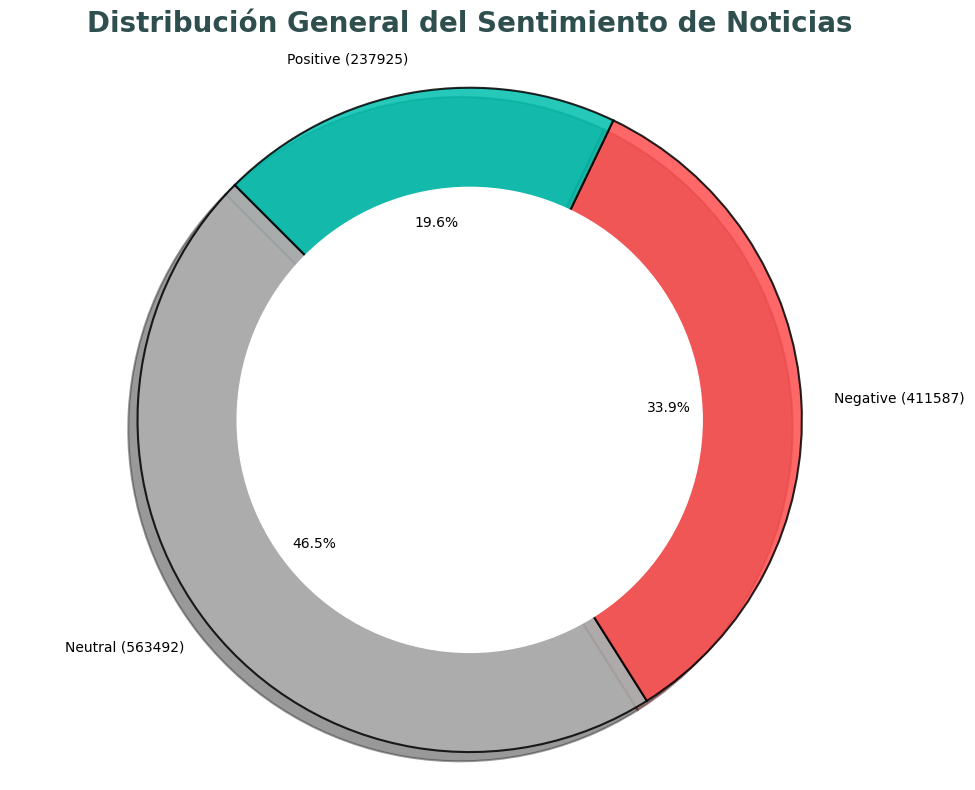

In [156]:
import matplotlib.pyplot as plt
import pandas as pd

# Asumimos que 'noticias' DataFrame tiene la columna 'vader_sentiment'
# Crear una nueva columna 'sentiment_category' basándonos en los valores de 'vader_sentiment'

def categorize_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

noticias['sentiment_category'] = noticias['vader_sentiment'].apply(categorize_sentiment)

# Contar las categorías de sentimiento
sentiment_counts = noticias['sentiment_category'].value_counts()

# Etiquetas y tamaños para el gráfico de pastel
labels = sentiment_counts.index
sizes = sentiment_counts.values

# Colores personalizados vibrantes y elegantes
colors = {
    'Positive': '#00bfae',  # Verde menta vibrante
    'Negative': '#ff4d4d',  # Rojo brillante
    'Neutral': '#b0b0b0'    # Gris suave
}
colored_labels = [f"{label} ({sizes[i]})" for i, label in enumerate(labels)]
pie_colors = [colors.get(label, 'lightgrey') for label in labels]  # Usar get para etiquetas no conocidas

# Crear gráfico de pastel con estilo profesional
plt.figure(figsize=(10, 8))

# Pie chart con sombra, bordes suaves y rotación
plt.pie(sizes, 
        labels=colored_labels, 
        colors=pie_colors, 
        autopct='%1.1f%%', 
        startangle=135,  # Ángulo de inicio para mejor distribución
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5, 'linestyle': 'solid', 'alpha': 0.85}, 
        shadow=True)

# Título del gráfico con fuente personalizada
plt.title('Distribución General del Sentimiento de Noticias', 
          fontsize=20, 
          fontweight='bold', 
          color='darkslategray', 
          pad=20)

# Añadir un círculo en el centro para darle forma de dona
centre_circle = plt.Circle((0,0), 0.70, color='white', fc='white', edgecolor='black')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Asegurarse de que la proporción sea igual (gráfico circular)
plt.axis('equal')

# Agregar un estilo visual
plt.tight_layout()

# Mostrar gráfico
plt.show()


In [70]:
print(noticias.head())

  publish_date                                      headline_text  \
0   2003-02-19  aba decides against community broadcasting lic...   
1   2003-02-19     act fire witnesses must be aware of defamation   
2   2003-02-19     a g calls for infrastructure protection summit   
3   2003-02-19           air nz staff in aust strike for pay rise   
4   2003-02-19      air nz strike to affect australian travellers   

   vader_sentiment sentiment_category sentiment_category_adjusted  
0           0.0000            Neutral                     Neutral  
1          -0.3400           Negative                    Negative  
2           0.0000            Neutral                     Neutral  
3          -0.2263           Negative                    Negative  
4          -0.1280           Negative                    Negative  


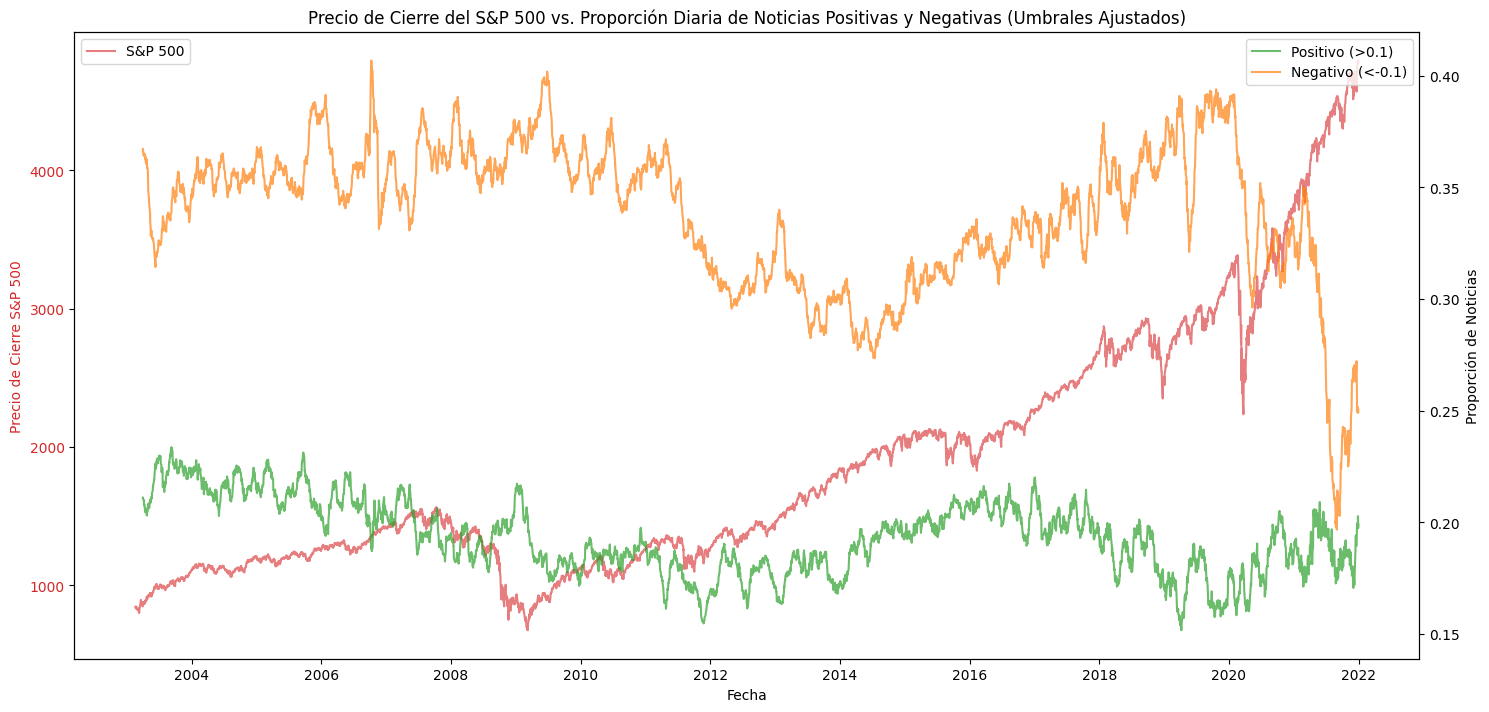

In [77]:
# Definir los nuevos umbrales de sentimiento
positive_threshold = 0.1
negative_threshold = -0.1

# Función para clasificar el sentimiento con los nuevos umbrales
def classify_sentiment_adjusted(score):
    if score > positive_threshold:
        return 'Positive'
    elif score < negative_threshold:
        return 'Negative'
    else:
        return 'Neutral'

# Aplicar la clasificación ajustada al DataFrame original
noticias['sentiment_category_adjusted'] = noticias['vader_sentiment'].apply(classify_sentiment_adjusted)

# Calcular la proporción diaria de noticias positivas y negativas con los nuevos umbrales
daily_sentiment_proportions_adjusted = noticias.groupby('publish_date')['sentiment_category_adjusted'].value_counts(normalize=True).unstack(fill_value=0)
daily_sentiment_proportions_adjusted = daily_sentiment_proportions_adjusted[['Positive', 'Negative']] # Asegurarse del orden de las columnas

# Unir con el precio de cierre del S&P 500
combined_with_sentiment_adjusted = sp500_close_df.join(daily_sentiment_proportions_adjusted, how='inner')

# Suavizar las proporciones con una media móvil (opcional)
rolling_window = 30
combined_with_sentiment_adjusted['Positive_MA'] = combined_with_sentiment_adjusted['Positive'].rolling(window=rolling_window).mean()
combined_with_sentiment_adjusted['Negative_MA'] = combined_with_sentiment_adjusted['Negative'].rolling(window=rolling_window).mean()

# Graficar con los umbrales ajustados
fig, ax1 = plt.subplots(figsize=(15, 7))

color = 'tab:red'
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Precio de Cierre S&P 500', color=color)
ax1.plot(combined_with_sentiment_adjusted.index, combined_with_sentiment_adjusted['Close_Price'], color=color, alpha=0.6, label='S&P 500')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()

color_positive = 'tab:green'
ax2.set_ylabel('Proporción de Noticias', color='black')
ax2.plot(combined_with_sentiment_adjusted.index, combined_with_sentiment_adjusted['Positive_MA'] if 'Positive_MA' in combined_with_sentiment_adjusted else combined_with_sentiment_adjusted['Positive'], color=color_positive, alpha=0.7, label='Positivo (>{})'.format(positive_threshold))

color_negative = 'tab:orange'
ax2.plot(combined_with_sentiment_adjusted.index, combined_with_sentiment_adjusted['Negative_MA'] if 'Negative_MA' in combined_with_sentiment_adjusted else combined_with_sentiment_adjusted['Negative'], color=color_negative, alpha=0.7, label='Negativo (<{})'.format(negative_threshold))

ax2.tick_params(axis='y', labelcolor='black')
ax2.legend(loc='upper right')

fig.tight_layout()
plt.title('Precio de Cierre del S&P 500 vs. Proporción Diaria de Noticias Positivas y Negativas (Umbrales Ajustados)')
plt.show()

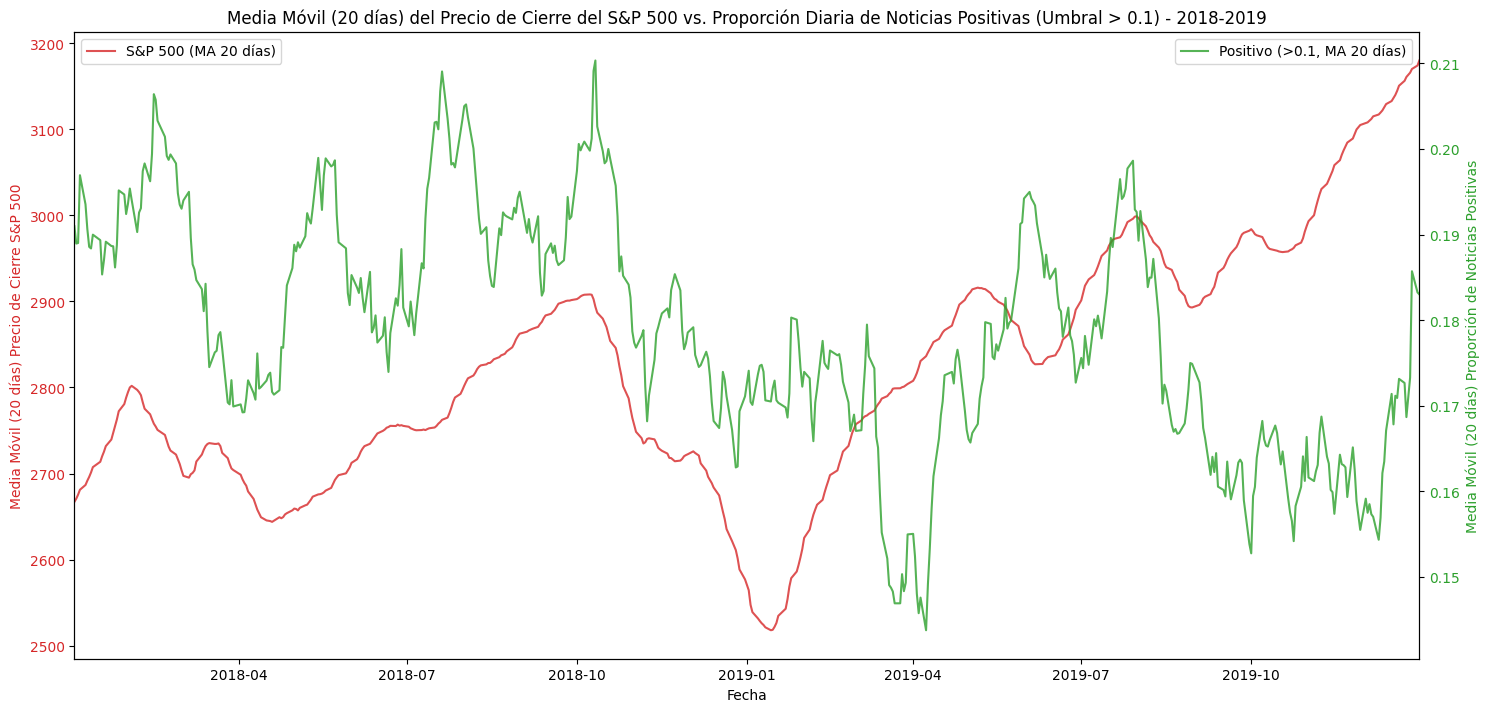

In [78]:
import matplotlib.pyplot as plt

# Define the rolling window size
rolling_window = 20

# Calculate the rolling mean for both S&P 500 price and positive sentiment
combined_with_sentiment_adjusted['Close_Price_MA'] = combined_with_sentiment_adjusted['Close_Price'].rolling(window=rolling_window).mean()
combined_with_sentiment_adjusted['Positive_MA_30'] = combined_with_sentiment_adjusted['Positive'].rolling(window=rolling_window).mean()

# Filter the data for the years 2018 and 2019
start_date = '2018-01-01'
end_date = '2019-12-31'
sampled_data = combined_with_sentiment_adjusted[(combined_with_sentiment_adjusted.index >= start_date) & (combined_with_sentiment_adjusted.index <= end_date)]

fig, ax1 = plt.subplots(figsize=(15, 7))

color = 'tab:red'
ax1.set_xlabel('Fecha')
ax1.set_ylabel(f'Media Móvil ({rolling_window} días) Precio de Cierre S&P 500', color=color)
ax1.plot(sampled_data.index, sampled_data['Close_Price_MA'], color=color, alpha=0.8, label=f'S&P 500 (MA {rolling_window} días)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()

color_positive = 'tab:green'
ax2.set_ylabel(f'Media Móvil ({rolling_window} días) Proporción de Noticias Positivas', color=color_positive)
ax2.plot(sampled_data.index, sampled_data['Positive_MA_30'], color=color_positive, alpha=0.8, label=f'Positivo (>{positive_threshold}, MA {rolling_window} días)')
ax2.tick_params(axis='y', labelcolor=color_positive)
ax2.legend(loc='upper right')

fig.tight_layout()
plt.title(f'Media Móvil ({rolling_window} días) del Precio de Cierre del S&P 500 vs. Proporción Diaria de Noticias Positivas (Umbral > {positive_threshold}) - 2018-2019')
plt.xlim(sampled_data.index.min(), sampled_data.index.max()) # Set x-axis limits to the sampled period
plt.show()

In [93]:
noticias['publish_date'].max()

'2021-12-31'

In [94]:
noticias['publish_date'].min()

'2003-02-19'

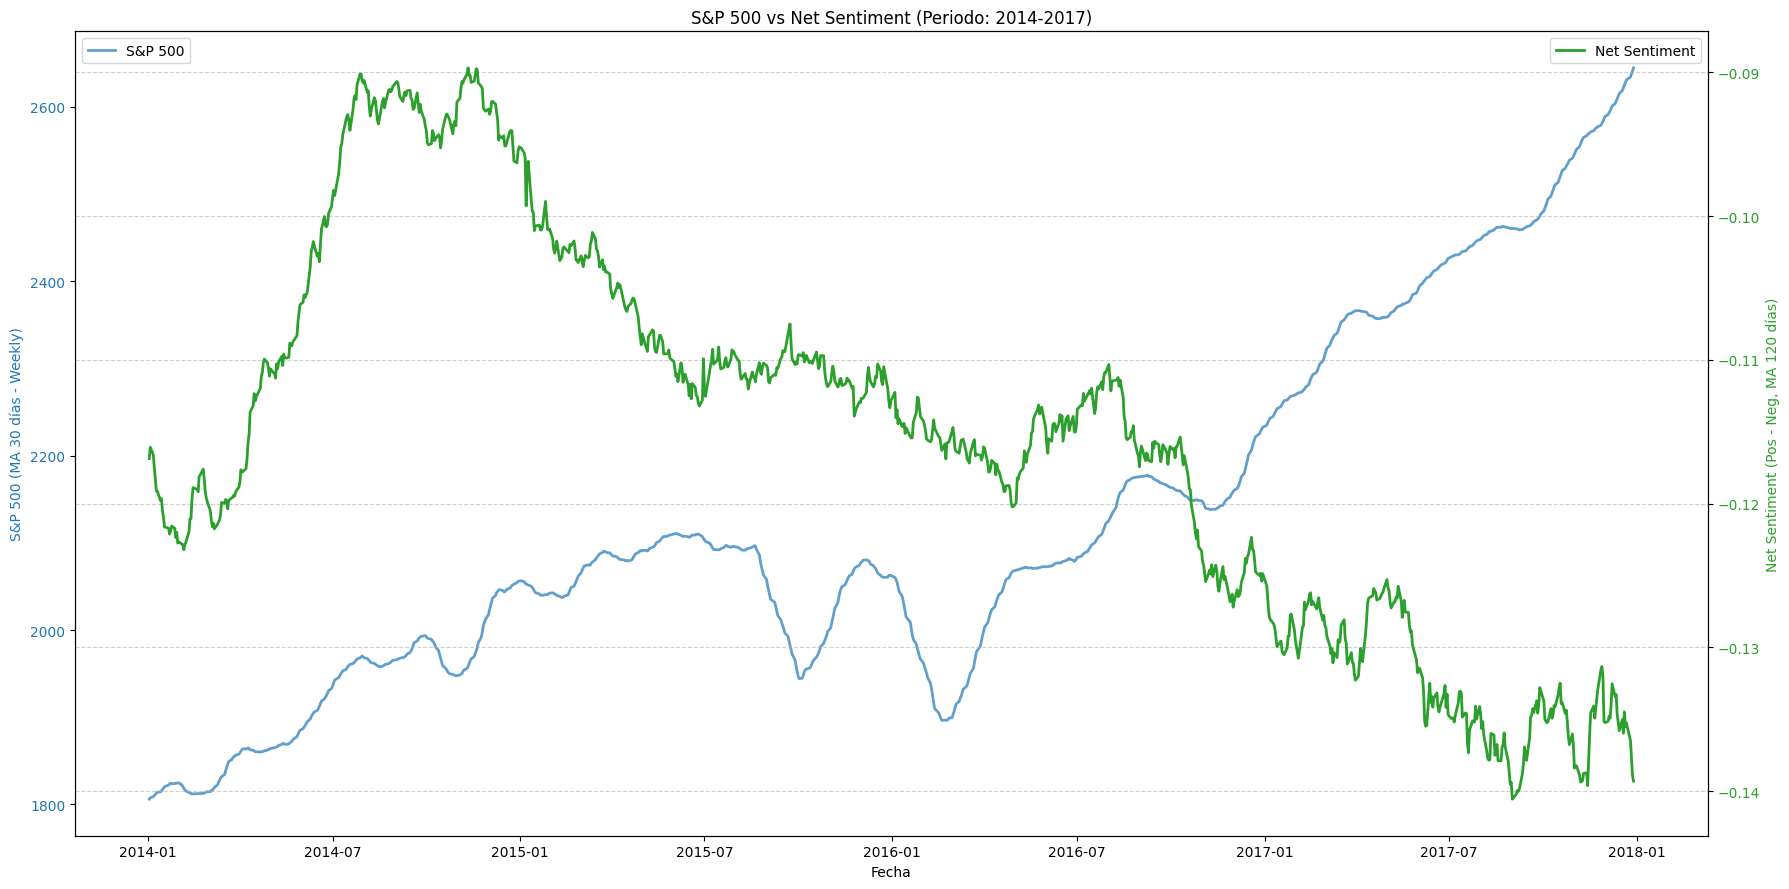

In [143]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'combined_with_sentiment_adjusted' is already calculated

rolling_window_sentiment = 120  # Smoothing window for sentiment
weekly_window_sp500 = 30       # Window for weekly smoothing of S&P 500

# Calculate weekly rolling mean for S&P 500
combined_with_sentiment_adjusted['SP500_Weekly_MA'] = combined_with_sentiment_adjusted['Close_Price'].rolling(window=weekly_window_sp500).mean()

# Calculate Net Sentiment Score
combined_with_sentiment_adjusted['Net_Sentiment_MA_60'] = (
    combined_with_sentiment_adjusted['Positive'].rolling(window=rolling_window_sentiment).mean() -
    combined_with_sentiment_adjusted['Negative'].rolling(window=rolling_window_sentiment).mean()
)

# Define the COVID crisis period
start_date = '2014-01-01'
end_date = '2017-12-31'
df_covid = combined_with_sentiment_adjusted[(combined_with_sentiment_adjusted.index >= start_date) & (combined_with_sentiment_adjusted.index <= end_date)].copy()

# Create the plot
fig, ax1 = plt.subplots(figsize=(18, 9))

# Plot S&P 500 (Weekly Smoothed)
color = 'tab:blue'
ax1.set_xlabel('Fecha')
ax1.set_ylabel(f'S&P 500 (MA {weekly_window_sp500} días - Weekly)', color=color)
ax1.plot(df_covid.index, df_covid['SP500_Weekly_MA'], color=color, linewidth=2, alpha=0.7, label='S&P 500')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

# Create a second y-axis for Smoothed Net Sentiment
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel(f'Net Sentiment (Pos - Neg, MA {rolling_window_sentiment} días)', color=color)
ax2.plot(df_covid.index, df_covid['Net_Sentiment_MA_60'], color=color, linewidth=2, label=f'Net Sentiment')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('S&P 500 vs Net Sentiment (Periodo: 2014-2017)')
plt.grid(True, which="major", linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

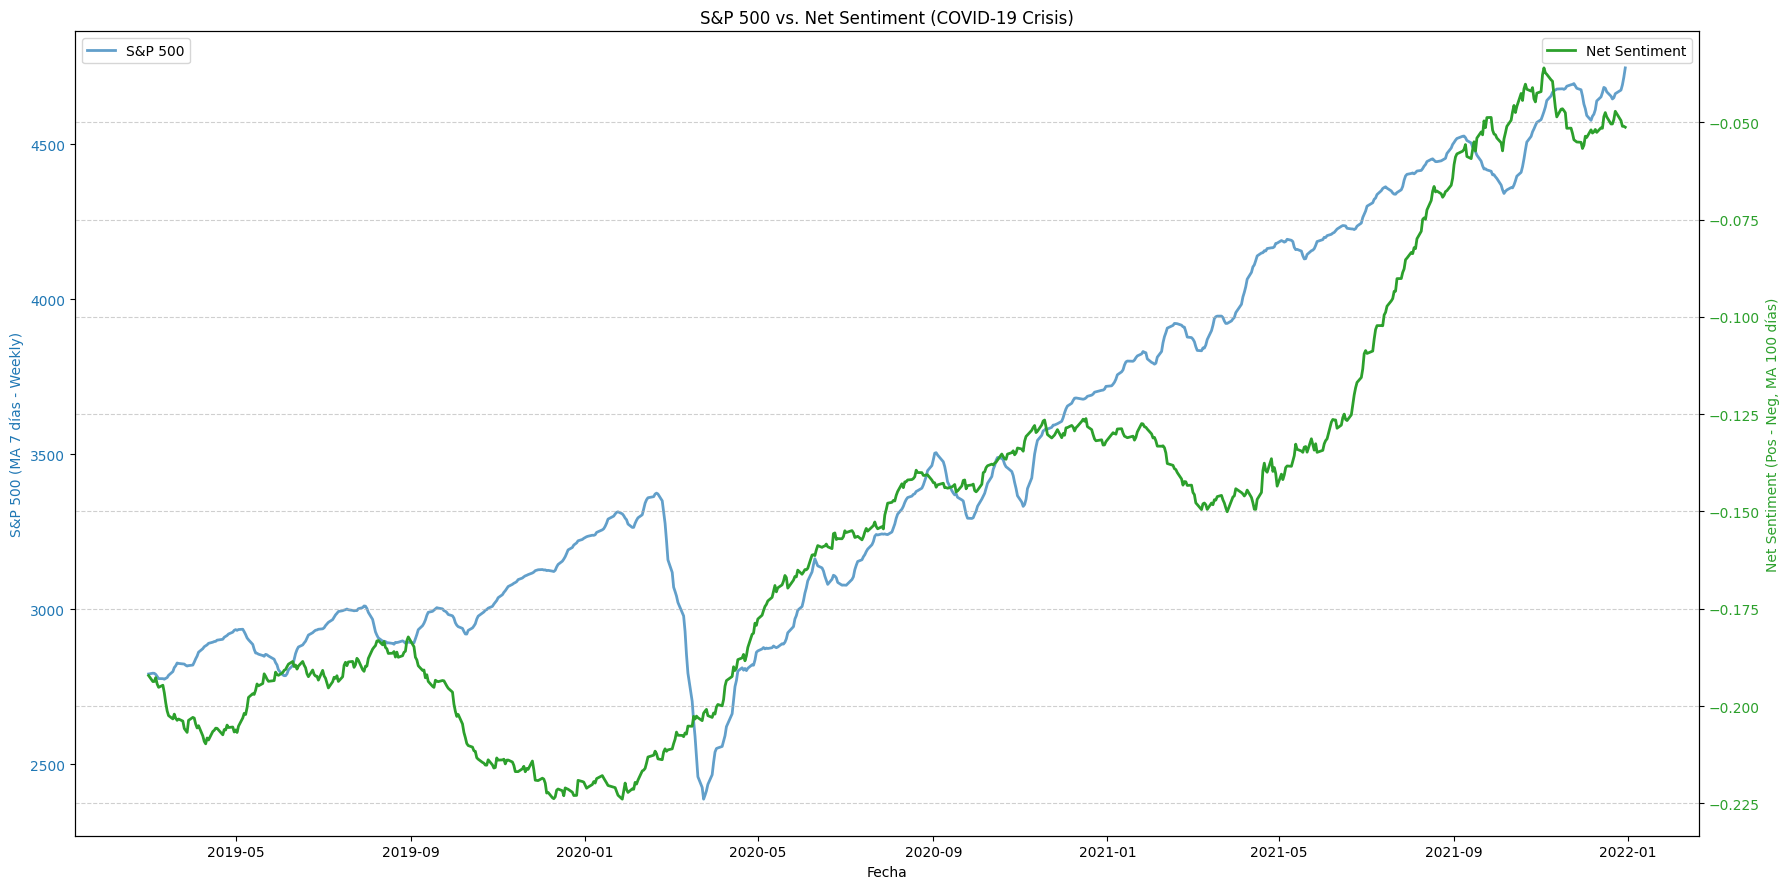

In [125]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'combined_with_sentiment_adjusted' is already calculated

rolling_window_sentiment = 100  # Smoothing window for sentiment
weekly_window_sp500 = 7       # Window for weekly smoothing of S&P 500

# Calculate weekly rolling mean for S&P 500
combined_with_sentiment_adjusted['SP500_Weekly_MA'] = combined_with_sentiment_adjusted['Close_Price'].rolling(window=weekly_window_sp500).mean()

# Calculate Net Sentiment Score
combined_with_sentiment_adjusted['Net_Sentiment_MA_60'] = (
    combined_with_sentiment_adjusted['Positive'].rolling(window=rolling_window_sentiment).mean() -
    combined_with_sentiment_adjusted['Negative'].rolling(window=rolling_window_sentiment).mean()
)

# Define the COVID crisis period
start_date = '2019-03-01'
end_date = '2024-03-31'
df_covid = combined_with_sentiment_adjusted[(combined_with_sentiment_adjusted.index >= start_date) & (combined_with_sentiment_adjusted.index <= end_date)].copy()

# Create the plot
fig, ax1 = plt.subplots(figsize=(18, 9))

# Plot S&P 500 (Weekly Smoothed)
color = 'tab:blue'
ax1.set_xlabel('Fecha')
ax1.set_ylabel(f'S&P 500 (MA {weekly_window_sp500} días - Weekly)', color=color)
ax1.plot(df_covid.index, df_covid['SP500_Weekly_MA'], color=color, linewidth=2, alpha=0.7, label='S&P 500')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

# Create a second y-axis for Smoothed Net Sentiment
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel(f'Net Sentiment (Pos - Neg, MA {rolling_window_sentiment} días)', color=color)
ax2.plot(df_covid.index, df_covid['Net_Sentiment_MA_60'], color=color, linewidth=2, label=f'Net Sentiment')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('S&P 500 vs. Net Sentiment (COVID-19 Crisis)')
plt.grid(True, which="major", linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

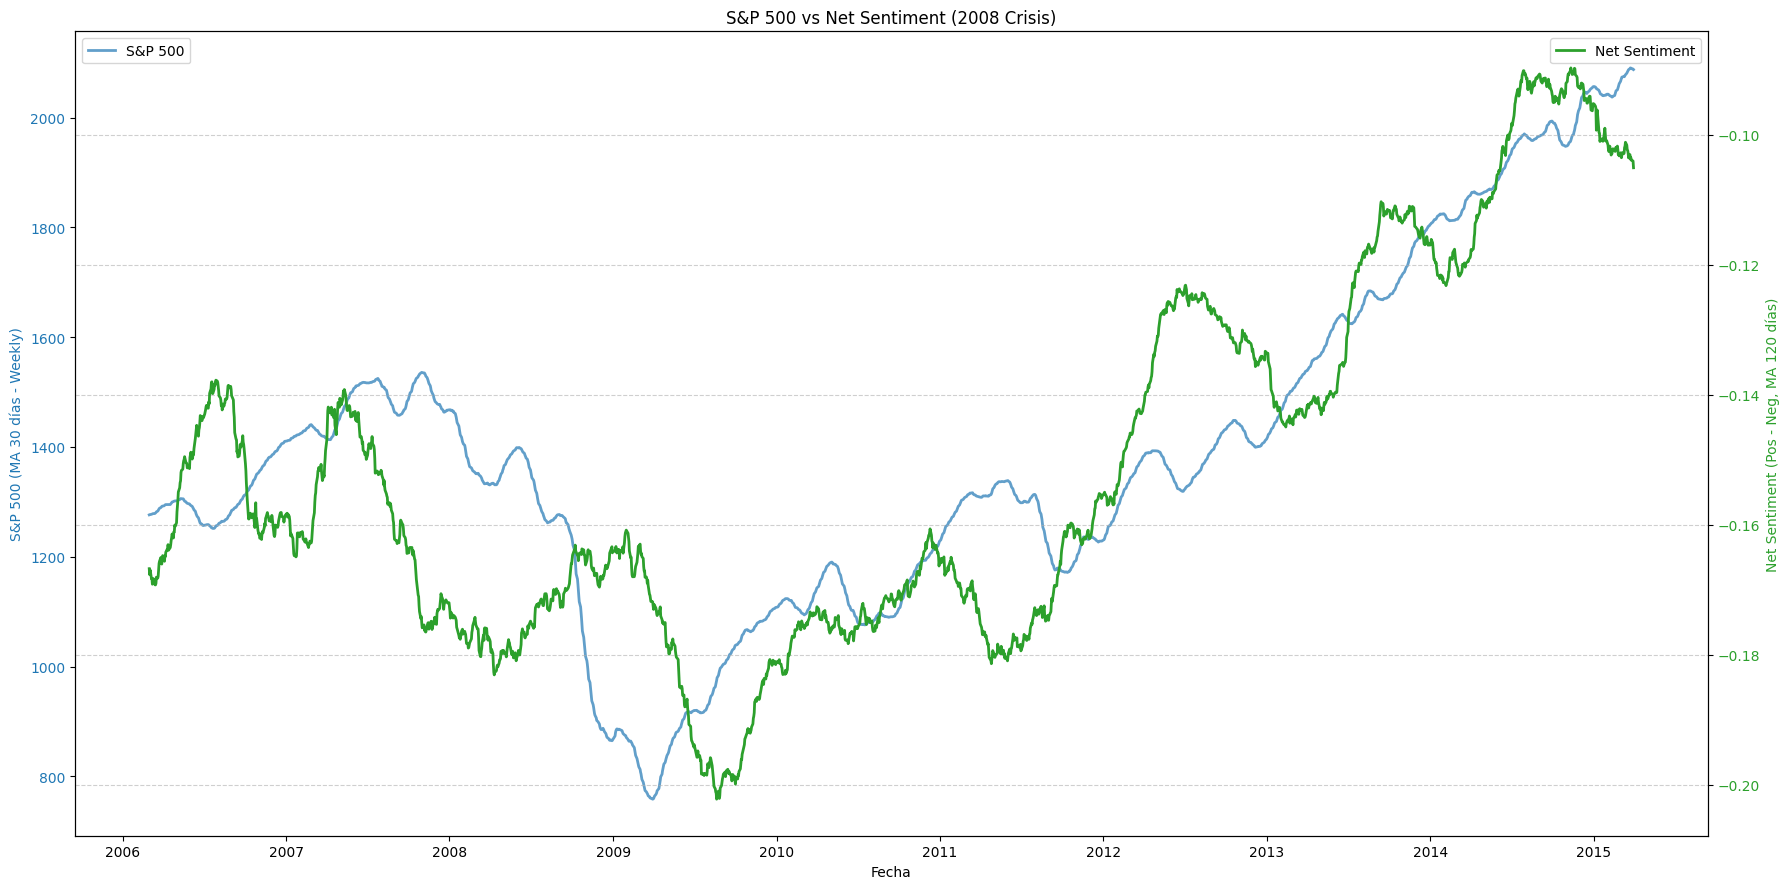

In [123]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'combined_with_sentiment_adjusted' is already calculated

rolling_window_sentiment = 120  # Smoothing window for sentiment
weekly_window_sp500 = 30       # Window for weekly smoothing of S&P 500

# Calculate weekly rolling mean for S&P 500
combined_with_sentiment_adjusted['SP500_Weekly_MA'] = combined_with_sentiment_adjusted['Close_Price'].rolling(window=weekly_window_sp500).mean()

# Calculate Net Sentiment Score
combined_with_sentiment_adjusted['Net_Sentiment_MA_60'] = (
    combined_with_sentiment_adjusted['Positive'].rolling(window=rolling_window_sentiment).mean() -
    combined_with_sentiment_adjusted['Negative'].rolling(window=rolling_window_sentiment).mean()
)

# Define the COVID crisis period
start_date = '2006-03-01'
end_date = '2015-03-31'
df_covid = combined_with_sentiment_adjusted[(combined_with_sentiment_adjusted.index >= start_date) & (combined_with_sentiment_adjusted.index <= end_date)].copy()

# Create the plot
fig, ax1 = plt.subplots(figsize=(18, 9))

# Plot S&P 500 (Weekly Smoothed)
color = 'tab:blue'
ax1.set_xlabel('Fecha')
ax1.set_ylabel(f'S&P 500 (MA {weekly_window_sp500} días - Weekly)', color=color)
ax1.plot(df_covid.index, df_covid['SP500_Weekly_MA'], color=color, linewidth=2, alpha=0.7, label='S&P 500')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

# Create a second y-axis for Smoothed Net Sentiment
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel(f'Net Sentiment (Pos - Neg, MA {rolling_window_sentiment} días)', color=color)
ax2.plot(df_covid.index, df_covid['Net_Sentiment_MA_60'], color=color, linewidth=2, label=f'Net Sentiment')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('S&P 500 vs Net Sentiment (2008 Crisis)')
plt.grid(True, which="major", linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [154]:
print(noticias.columns)


Index(['publish_date', 'headline_text', 'vader_sentiment'], dtype='object')


In [ ]:
import pandas as pd

# Assuming combined_with_sentiment_adjusted DataFrame exists with 'Close_Price' and 'Net_Sentiment_MA_60' columns and a DatetimeIndex

# Extract the year from the index
yearly_data = combined_with_sentiment_adjusted.groupby(combined_with_sentiment_adjusted.index.year)

# Calculate the correlation for each year
yearly_correlation = yearly_data[['Close_Price', 'Net_Sentiment_MA_60']].corr().unstack().iloc[:,1]

# Sort by the absolute value of the correlation in descending order
yearly_correlation_abs_sorted = yearly_correlation.abs().sort_values(ascending=False)

print("Años con mayor correlación entre el Net Sentiment y el S&P 500:")
print(yearly_correlation_abs_sorted)

Años con mayor correlación entre el Net Sentiment y el S&P 500:
2021    0.860003
2011    0.742917
2013    0.713936
2014    0.710002
2008    0.691584
2005    0.546538
2010    0.544410
2020    0.465373
2019    0.421108
2017    0.398128
2006    0.386883
2018    0.353348
2009    0.236535
2016    0.215279
2015    0.207639
2004    0.149253
2003    0.102897
2012    0.097474
2007    0.042277
Name: (Close_Price, Net_Sentiment_MA_60), dtype: float64


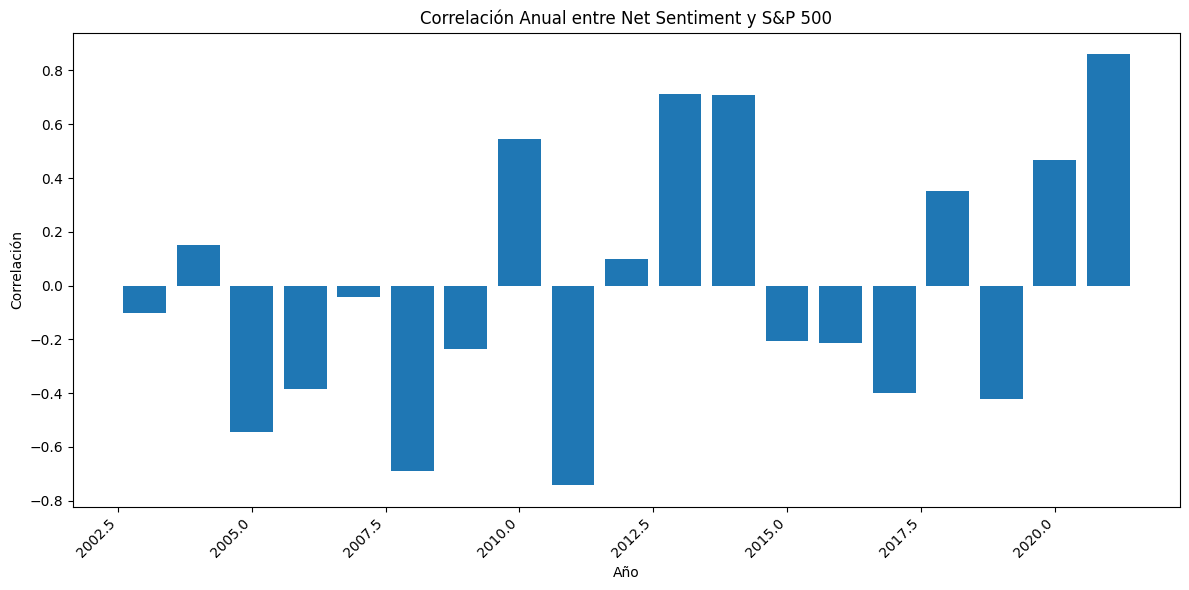

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming yearly_correlation is a pandas Series with years as index and correlation values

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the correlations
ax.bar(yearly_correlation.index, yearly_correlation.values)

# Customize the plot
ax.set_xlabel('Año')
ax.set_ylabel('Correlación')
ax.set_title('Correlación Anual entre Net Sentiment y S&P 500')
plt.xticks(rotation=45, ha='right')  # Rotate year labels for better readability
plt.tight_layout()

# Display the plot
plt.show()